In [1]:
import numpy as np
from keras.datasets import reuters

np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

Using TensorFlow backend.


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
from tensorflow.python.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
x_val = x_train[:1000]
partial_x_val = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_val = one_hot_train_labels[1000:]

In [9]:
history = model.fit(
    partial_x_val,
    partial_y_val,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 138us/sample - loss: 2.6566 - accuracy: 0.5158 - val_loss: 1.7983 - val_accuracy: 0.6340
Epoch 2/9
7982/7982 [==============================] - 0s 38us/sample - loss: 1.4721 - accuracy: 0.6987 - val_loss: 1.3432 - val_accuracy: 0.7060
Epoch 3/9
7982/7982 [==============================] - 0s 38us/sample - loss: 1.0871 - accuracy: 0.7699 - val_loss: 1.1569 - val_accuracy: 0.7570
Epoch 4/9
7982/7982 [==============================] - 0s 37us/sample - loss: 0.8488 - accuracy: 0.8240 - val_loss: 1.0482 - val_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 0s 41us/sample - loss: 0.6708 - accuracy: 0.8621 - val_loss: 0.9677 - val_accuracy: 0.8070
Epoch 6/9
7982/7982 [==============================] - 0s 39us/sample - loss: 0.5287 - accuracy: 0.8931 - val_loss: 0.9424 - val_accuracy: 0.7960
Epoch 7/9
7982/7982 [==============================] - 0s 38us/sample - los

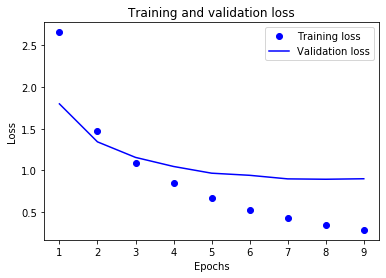

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

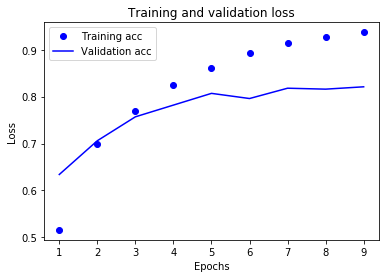

In [11]:
plt.clf()

history_dict = history.history
acc_values = history_dict['accuracy']
acc_loss_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, acc_loss_values, 'b', label='Validation acc') # 'b' == solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
results = model.evaluate(x_test, one_hot_test_labels, verbose=2)

2246/1 - 0s - loss: 1.7811 - accuracy: 0.7858


In [16]:
# accuracy on a random prediction
import copy
test_labels_copy = copy.copy(test_labels)

np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18655387355298308

In [21]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.9999998
3
